In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from sample_data import *
users, ratings, books = get_saved_samples()

# Books

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...
18,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62209 entries, 1 to 271329
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 62209 non-null  object
 1   Book-Title           62209 non-null  object
 2   Book-Author          62209 non-null  object
 3   Year-Of-Publication  62209 non-null  object
 4   Publisher            62207 non-null  object
 5   Image-URL-S          62209 non-null  object
 6   Image-URL-M          62209 non-null  object
 7   Image-URL-L          62209 non-null  object
dtypes: object(8)
memory usage: 4.3+ MB


In [5]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,62209,62209,62209,62209,62207,62209,62209,62209
unique,62209,57268,27478,146,5366,62187,62187,62187
top,0002005018,"Phonics Fun: Reading Program, Pack 4 (Clifford...",Stephen King,2002,Harlequin,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
freq,1,12,236,4814,1849,2,2,2


In [6]:
books.duplicated().sum()

0

In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [8]:
books.dropna(subset=['Book-Author', 'Publisher', 'Image-URL-L'], inplace=True)



In [9]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
books.dropna(subset=['Year-Of-Publication'], inplace=True)




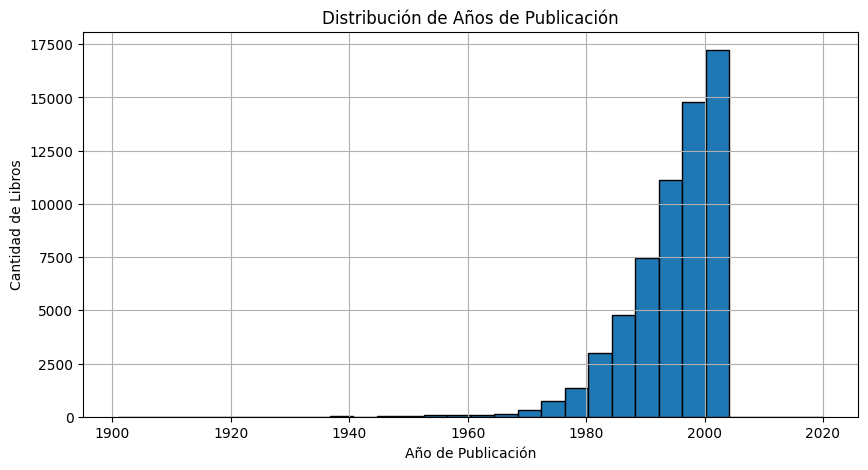

In [10]:
books = books[(books['Year-Of-Publication'] > 0) & (books['Year-Of-Publication'] <= pd.to_datetime('now').year)]

# Graficamos la distribución de los años de publicación
plt.figure(figsize=(10, 5))
books['Year-Of-Publication'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Años de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Libros')
plt.show()

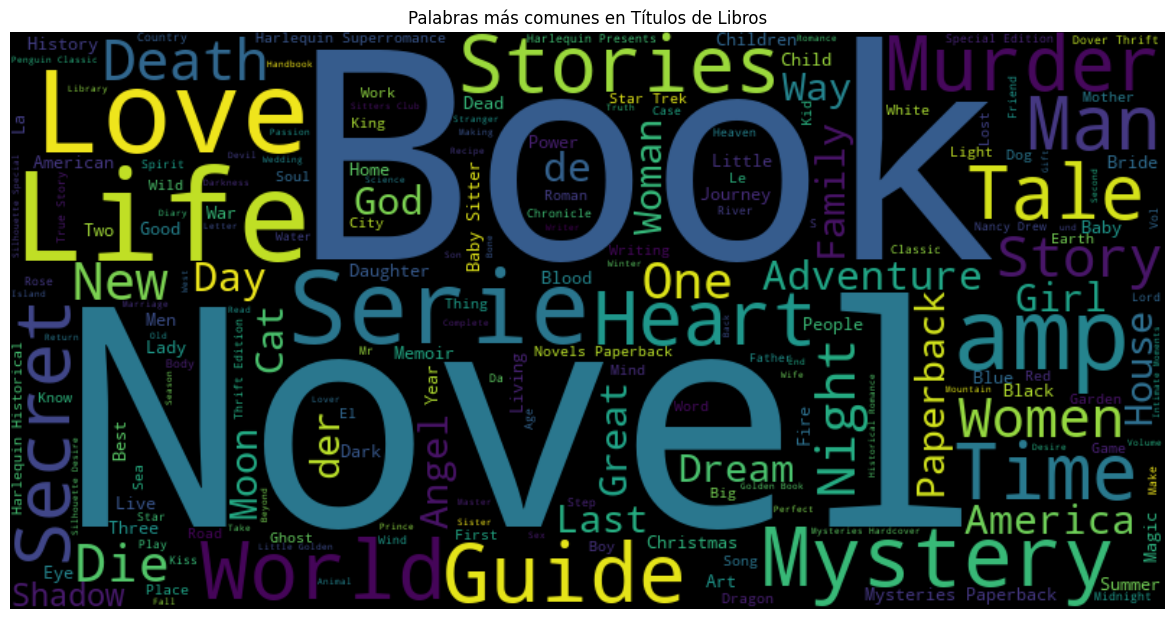

In [11]:
book_titles_string = ' '.join(books['Book-Title'].fillna(''))  # Unimos todos los títulos en una sola cadena
wordcloud = WordCloud(width=800, height=400).generate(book_titles_string)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Quitamos los ejes
plt.title('Palabras más comunes en Títulos de Libros')
plt.show()

# Ratings

In [12]:
ratings.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
28,276754,0684867621,8
83,276788,0345443683,8
84,276788,043935806X,7
85,276788,055310666X,10


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116932 entries, 0 to 1149651
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      116932 non-null  int64 
 1   ISBN         116932 non-null  object
 2   Book-Rating  116932 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


In [13]:
ratings.describe()

,User-ID,Book-Rating
count,116932.000000,116932.000000
mean,143165.309949,2.957197
std,77906.308844,3.921486
min,32.000000,0.000000
25%,85340.500000,0.000000
50%,131046.000000,0.000000
75%,216683.000000,7.000000
max,278819.000000,10.000000


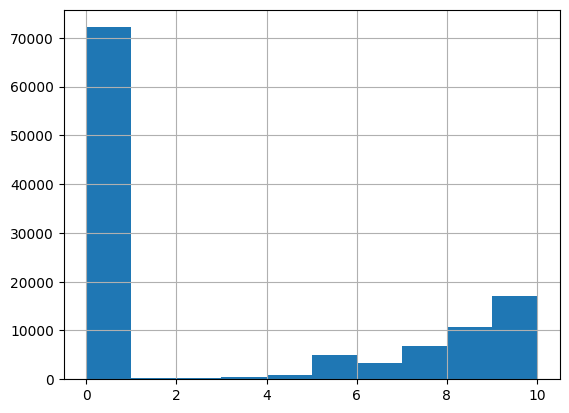

In [14]:
ratings['Book-Rating'].hist()
plt.show()

# Users

In [15]:
users.head()


,User-ID,Location,Age
171438,171439,"san francisco, california, usa",NaN
162383,162384,"los angeles, california, usa",39.0
19785,19786,"penrith, cumbria, united kingdom",35.0
54696,54697,"hamilton, ohio, usa",48.0
60114,60115,"sandy hook, connecticut, usa",22.0


In [16]:
users.describe()

,User-ID,Age
count,27886.000000,16817.000000
mean,139312.689271,34.600523
std,80586.102578,14.258388
min,3.000000,0.000000
25%,69208.750000,24.000000
50%,139097.500000,32.000000
75%,209487.000000,44.000000
max,278853.000000,148.000000


In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27886 entries, 171438 to 21649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   27886 non-null  int64  
 1   Location  27886 non-null  object 
 2   Age       16817 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 871.4+ KB


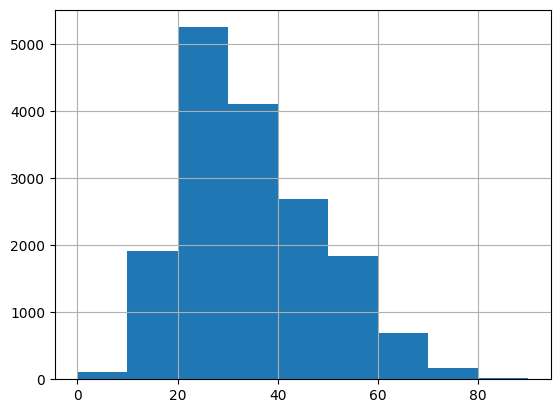

In [17]:
users['Age'].dropna().hist(bins=range(0, 100, 10))  # Eliminamos NA para el histograma
plt.show()